<a href="https://colab.research.google.com/github/DLPietro/learning-roadmap/blob/main/notebooks/day_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 8 – Structuring the Dashboard

Main Goals

- Create a reusable function to download data for selected tickers and period
- Handle missing values (forward fill or drop)
- Return a clean DataFrame as the basis for the dashboard


1) Preparatory Exercise - Creating a Simple Function

In [ ]:
# Example: create a function that takes a list of numbers and returns their squares
def number_root(numbers):
    return [i**0.5 for i in numbers]

print(number_root([9, 25, 36, 10000]))

[3.0, 5.0, 6.0, 100.0]


2) Main Task – Data Download & Cleaning

In [ ]:
# Step 1: Define a function to download cleaned closed price data
import yfinance as yf, numpy as np, pandas as pd, matplotlib.pyplot as plt

def get_data(tickers, period):
  """Get cleaned data given assets (tickers), and selected period"""
  data = yf.download(tickers, period)
  closed_prices = data["Close"]
  clean_data = closed_prices.ffill()

  return clean_data

# Step 2: Testing function
tickers = ["IWM", "GLD", "IGOV", "AAPL"]
period = "30d"
prices = get_data(tickers, period = period)

print(prices.head(10))

/tmp/ipython-input-445315520.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period)
[*********************100%***********************]  4 of 4 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['IWM', 'AAPL', 'GLD', 'IGOV']: ValueError("time data '30d' does not match format '%Y-%m-%d'")


Empty DataFrame
Columns: [AAPL, GLD, IGOV, IWM]
Index: []


3) Consolidation Exercise - Calculate Correlation and Plot

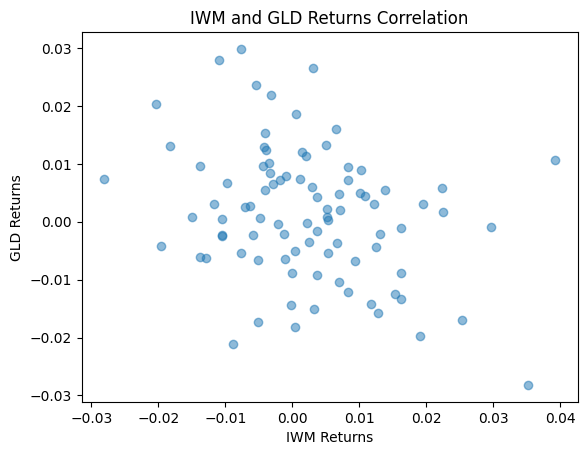

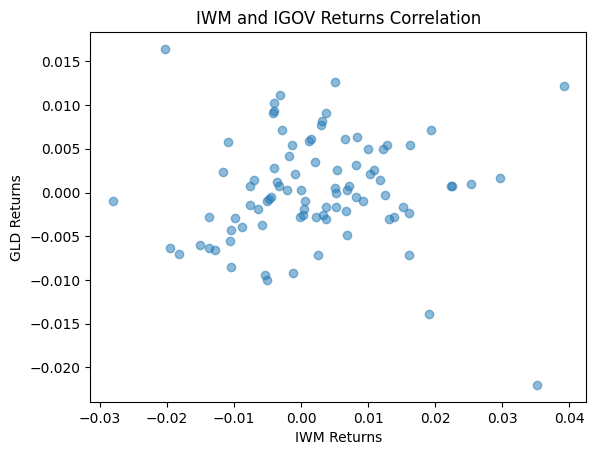

Ticker       GLD      IGOV       IWM
Ticker                              
GLD     1.000000  0.565416 -0.296243
IGOV    0.565416  1.000000  0.038841
IWM    -0.296243  0.038841  1.000000


In [ ]:
# Step 4: Daily Returns
daily_returns = data["Close"].pct_change().dropna()

# Step 5: IWM vs GLD correlation between 2 assets plot, and then IWM vs IGOV
plt.scatter(daily_returns["IWM"], daily_returns["GLD"], alpha=0.5)
plt.title("IWM and GLD Returns Correlation")
plt.xlabel("IWM Returns")
plt.ylabel("GLD Returns")
plt.show()

plt.scatter(daily_returns["IWM"], daily_returns["IGOV"], alpha=0.5)
plt.title("IWM and IGOV Returns Correlation")
plt.xlabel("IWM Returns")
plt.ylabel("GLD Returns")
plt.show()

# Step 6: Correlation Matrix Calculation
correlation = daily_returns.corr()
print(correlation)